# Linalg Demo

Linalg is a basic linear algebra library that supports all the basic matrix operations such as additional, matrix multiplication, transpose, inverse, determinants and more. 
It also supports matrix slicing like numpy and can be used to create many statistical models like linear regression, PCA, and even neural networks.

In [1]:
import numpy as np
import linalg
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

In [ ]:
# Creating a matrix
a = linalg.Matrix([1, 2, 3, 4], rows=2)
print(a)

In [ ]:
# Explicit error handling for invalid matrices
# Cannot have a matrix of this size
a = linalg.Matrix([1, 2, 3, 4, 5], rows=2)

In [ ]:
# Basic matrix operations
a = linalg.Matrix([1, 2, 3, 4], rows=2)
b = linalg.Matrix.identity(2)

# Addition
print("Addition Result:")
print(a + b)
print()

# Subtraction
print("Subtraction Result:")
print(a - b)
print()

# Scalar multiplication
print("Multiplication Result:")
print(b * 5)
print()

# Transpose
print("Transpose Result:")
print(a.transpose())

In [ ]:
# Other matrix operations
# Matrix multiplication
print("Matmul Result:")
print(a @ b)
print()

elimination, steps = a.gaussian_elimination()
# Gaussian Elimination
print("Elimiation Result:")
print(elimination)
print()

elimination, steps = a.gaussian_elimination(rref=True)
# Gaussian Elimination in RREF
print("Elimiation Result:")
print(elimination)
print()

In [ ]:
# Determinant
print("Determinant:")
print(a.det())
print()

# Inverse
a_inv = a.inverse()
print("Inverse:")
print(a_inv)
print()

# Results in identity matrix
print("Inverse Result (Matrix multiplied by Inverse should be identity):")
print("a @ b")
print(a_inv @ a)
print()



In [ ]:
# LU Decomposition
L, U = a.lu_decomp()
print("L Matrix:")
print(L)
print()

print("U Matrix:")
print(U)
print()

# Multiplication should result in original matrix
print("LU Decomposition Result (L * U should be original matrix):")
print(L @ U)
print()

print("Original Matrix:")
print(a)

In [ ]:
# Works on matrices of any size
rand_data = np.random.randint(100, size=100).tolist()
a = linalg.Matrix(rand_data, rows=10)

elimination, steps = a.gaussian_elimination(rref=True)
# Gaussian Elimination in RREF
print("Elimiation Result:")
print(elimination)
print()

# Inverse
a_inv = a.inverse()
print("Inverse:")
print(a_inv)
print()

# Results in identity matrix
print("Inverse Result (Matrix multiplied by Inverse should be approximately identity):")
print("a @ b")
print(a_inv @ a)

In [ ]:
# Slicing
a = linalg.Matrix([1, 2, 3, 4, 5, 6, 7, 8, 9], rows=3)

print("Original Matrix")
print(a)
print()

# Get all second column
print("Second Column")
print(a[:, 1])
print()

# Get all in second to third column
print("Second to Third Column")
print(a[:, 1:3])
print()

# Get all in first two rows
print("First two rows")
print(a[:, 1:3])
print(a[:2])
print()

# Get single element
print("Single element")
print(a[1, 1])

# Library Applications
## Linear Regression and Ordinary Least Squares

Linear regression is one of most widely used techniques in statistics and machine learning, and has many real world applications in modeling. Calculating regression lines is very simple with linear algebra with the formula,

$$
W=(X^TX)^{-1}X^Ty
$$

Where $W$ is the matrix with the parameters where the first element is the intercept and second is the slope. $X$ is the matrix of features and $y$ is the target variable.

In [8]:
# Generate random data
x = np.linspace(0, 10, 20)
y = (5 * x + 1 + np.random.normal(0, 2, size=x.shape).tolist())

# Convert into flat list
# X are vectors (1, x) for the intercept term
data = [(1, float(n)) for n in x]
data_unflat = []
for d1, d2 in data:
    data_unflat.extend([d1, d2])

# Create our matrices
X = linalg.Matrix(data_unflat, rows=len(x))

# Convert y into a vector
Y = linalg.Matrix(y, rows=len(y))

# Calculate the parameters
W = ((X.transpose() @ X).inverse() @ X.transpose()) @ Y
print(W)

Matrix([1.144]
       [4.865], rows=2, cols=1)


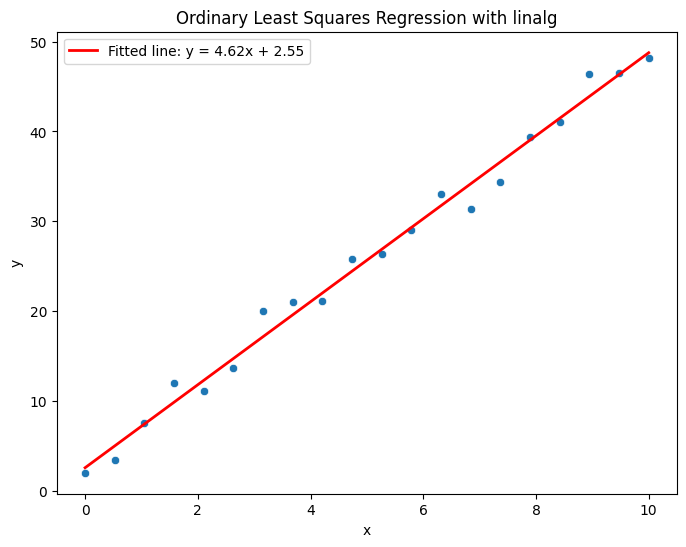

In [7]:
slope = W[1, 0].data[0][0]
intercept = W[0, 0].data[0][0]

y_pred = [n * slope + intercept for n in x]

# Plot the data and the fitted line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y)
plt.plot(x, y_pred, color='red', label=f'Fitted line: y = {slope:.2f}x + {intercept:.2f}', lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ordinary Least Squares Regression with linalg')
plt.legend()
plt.show()